<a href="https://colab.research.google.com/github/desaisrkr/ANDROID-19/blob/master/01_PyCaret_for_Regression_with_Results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# **PyCaret for Regression**
---
- It is a bundle of many Machine Learning algorithms.
- Only three lines of code is required to compare 20 ML models.
- Pycaret is available for:
    - Classification
    - Regression
    - Clustering

---

### **Self Learning Resource**
1. Tutorial on Pycaret <a href="https://pycaret.readthedocs.io/en/latest/tutorials.html"> Click Here</a> 

2. Documentation on Pycaret-Regression: <a href="https://pycaret.org/regression/"> Click Here </a>

---

### **In this tutorial we will learn:**

- Getting Data: How to import data from PyCaret repository
- Setting up Environment: How to setup an experiment in PyCaret and get started with building regression models
- Create Model: How to create a model, perform cross validation and evaluate regression metrics
- Tune Model: How to automatically tune the hyperparameters of a regression model
- Plot Model: How to analyze model performance using various plots
- Finalize Model: How to finalize the best model at the end of the experiment
- Predict Model: How to make prediction on new / unseen data
- Save / Load Model: How to save / load a model for future use

---



#### **(a) Install Pycaret**

In [1]:
!pip install pycaret &> /dev/null
print ("Pycaret installed sucessfully!!")

Pycaret installed sucessfully!!


#### **(b) Get the version of the pycaret**

In [3]:
from pycaret.utils import version
version()

'2.3.1'

---
# **1. Regression: Basics**
---

### **1.1 Loading Dataset - Loading dataset from pycaret**

In [18]:
from pycaret.datasets import get_data

# No output

---
### **1.2 Get the list of datasets available in pycaret (55)**
---

In [ ]:
# Internet connection is required
dataSets = get_data('index')

,Dataset,Data Types,Default Task,Target Variable 1,Target Variable 2,# Instances,# Attributes,Missing Values
0,anomaly,Multivariate,Anomaly Detection,None,None,1000,10,N
1,france,Multivariate,Association Rule Mining,InvoiceNo,Description,8557,8,N
2,germany,Multivariate,Association Rule Mining,InvoiceNo,Description,9495,8,N
3,bank,Multivariate,Classification (Binary),deposit,None,45211,17,N
4,blood,Multivariate,Classification (Binary),Class,None,748,5,N
5,cancer,Multivariate,Classification (Binary),Class,None,683,10,N
6,credit,Multivariate,Classification (Binary),default,None,24000,24,N
7,diabetes,Multivariate,Classification (Binary),Class variable,None,768,9,N
8,electrical_grid,Multivariate,Classification (Binary),stabf,None,10000,14,N
9,employee,Multivariate,Classification (Binary),left,None,14999,10,N


---
### **1.3 Get boston dataset**
---

In [19]:
bostonDataSet = get_data("boston")    # SN is 46
# This is regression dataset. The values in medv are continuous values

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Read data from file

In [20]:
# import pandas as pd
# bostonDataSet = pd.read_csv("myFile.csv")

---
### **1.4 Parameter setting for all regression models**
- Train/Test division
- Sampling
- Normalization
- Transformation
- PCA (Dimention Reduction)
- Handaling of Outliers
- Feature Selection
---

In [21]:
from pycaret.regression import *
s = setup(data =  bostonDataSet, target='medv', silent=True)

,Description,Value
0,session_id,1587
1,Target,medv
2,Original Data,"(506, 14)"
3,Missing Values,False
4,Numeric Features,11
5,Categorical Features,2
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(354, 21)"


---
### **1.5 Run and compare the Model Performance**
---

In [22]:
cm = compare_models()
# Explore more parameters

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,2.0524,10.0056,3.0272,0.8634,0.1337,0.1011,0.451
gbr,Gradient Boosting Regressor,2.2287,11.6178,3.2382,0.8519,0.1450,0.1107,0.102
lightgbm,Light Gradient Boosting Machine,2.3014,12.3501,3.3289,0.8421,0.1524,0.1152,0.095
rf,Random Forest Regressor,2.3313,13.5731,3.4857,0.8287,0.1496,0.1145,0.523
ada,AdaBoost Regressor,2.9354,16.8757,3.9752,0.7822,0.1778,0.1521,0.109
ridge,Ridge Regression,3.1151,20.2648,4.3311,0.7436,0.2416,0.1597,0.016
lr,Linear Regression,3.1433,20.1960,4.3453,0.7413,0.2407,0.1603,0.015
lar,Least Angle Regression,3.1433,20.1959,4.3453,0.7413,0.2407,0.1603,0.021
br,Bayesian Ridge,3.1211,20.6784,4.3667,0.7404,0.2321,0.1592,0.016
huber,Huber Regressor,3.3990,25.5905,4.8573,0.6876,0.2610,0.1703,0.053


---
### **1.6 Three line of code for model comparison for "Insurance" dataset**
---

In [23]:
from pycaret.datasets import get_data
from pycaret.regression import *

insuranceDataSet = get_data("insurance")
s = setup(data = insuranceDataSet, target='charges', silent=True)
cm = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2730.7448,2.315814e+07,4727.5880,0.8325,0.4428,0.3224,0.102
lightgbm,Light Gradient Boosting Machine,3024.7509,2.536349e+07,4954.9797,0.8152,0.5361,0.3702,0.055
rf,Random Forest Regressor,2862.2757,2.539694e+07,4967.2655,0.8143,0.4664,0.3340,0.561
et,Extra Trees Regressor,2813.6149,2.761097e+07,5164.9766,0.7982,0.4726,0.3155,0.519
ada,AdaBoost Regressor,4299.0131,2.846644e+07,5283.3468,0.7920,0.6157,0.7103,0.040
ridge,Ridge Regression,4272.0060,3.717480e+07,6064.8231,0.7271,0.5654,0.4394,0.016
br,Bayesian Ridge,4269.5677,3.717492e+07,6064.9384,0.7271,0.5647,0.4389,0.018
lr,Linear Regression,4261.0375,3.718139e+07,6065.8481,0.7270,0.5640,0.4373,0.015
lasso,Lasso Regression,4260.3422,3.717402e+07,6065.2614,0.7270,0.5638,0.4373,0.017
llar,Lasso Least Angle Regression,4255.8346,3.718660e+07,6066.3479,0.7270,0.5718,0.4366,0.020


---
### **1.7 Three line of code for model comparison for "House" dataset**
---

In [24]:
from pycaret.datasets import get_data
from pycaret.regression import *

houseDataSet = get_data("house")
s = setup(data = houseDataSet, target='SalePrice', silent=True)
cm = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,1.854369e+04,9.986061e+08,3.061952e+04,8.569000e-01,0.1526,0.1073,0.248
gbr,Gradient Boosting Regressor,1.819742e+04,1.005337e+09,3.062082e+04,8.567000e-01,0.1498,0.1065,0.657
rf,Random Forest Regressor,1.910489e+04,1.079193e+09,3.177317e+04,8.457000e-01,0.1619,0.1141,2.317
ridge,Ridge Regression,2.053859e+04,1.448142e+09,3.564722e+04,8.016000e-01,0.1817,0.1214,0.065
omp,Orthogonal Matching Pursuit,1.902095e+04,1.468664e+09,3.524415e+04,7.998000e-01,0.1625,0.1113,0.041
en,Elastic Net,2.162367e+04,1.690916e+09,3.797880e+04,7.754000e-01,0.1708,0.1249,0.213
ada,AdaBoost Regressor,2.603871e+04,1.505515e+09,3.829385e+04,7.698000e-01,0.2094,0.1660,0.467
et,Extra Trees Regressor,2.357242e+04,1.673231e+09,3.929812e+04,7.585000e-01,0.1852,0.1337,2.608
lasso,Lasso Regression,2.159725e+04,1.763060e+09,3.889088e+04,7.575000e-01,0.2611,0.1300,0.206
br,Bayesian Ridge,2.550658e+04,2.077678e+09,4.277675e+04,7.166000e-01,0.1964,0.1454,0.272


---
# **2. Regression: Advance - 1**
---

#### **2.1 Model Performance using data "Normalization"**

In [26]:
s = setup(data = bostonDataSet, target = 'medv', normalize = True, normalize_method = 'zscore', silent=True)
cm = compare_models()

#normalize_method = {zscore, minmax, maxabs, robust}

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,2.0493,10.2493,3.0869,0.8630,0.1401,0.1059,0.462
lightgbm,Light Gradient Boosting Machine,2.2411,10.7771,3.2048,0.8569,0.1480,0.1141,0.044
gbr,Gradient Boosting Regressor,2.2230,11.4634,3.2880,0.8535,0.1469,0.1118,0.107
rf,Random Forest Regressor,2.2244,11.6733,3.2939,0.8466,0.1478,0.1132,0.520
knn,K Neighbors Regressor,2.6342,15.9072,3.8739,0.7930,0.1647,0.1256,0.065
ada,AdaBoost Regressor,2.8824,16.0642,3.9020,0.7898,0.1799,0.1514,0.117
br,Bayesian Ridge,3.1879,21.1838,4.5400,0.7233,0.2330,0.1593,0.018
ridge,Ridge Regression,3.2238,21.1933,4.5435,0.7229,0.2377,0.1609,0.016
lr,Linear Regression,3.2407,21.2497,4.5506,0.7222,0.2398,0.1617,0.018
dt,Decision Tree Regressor,3.0753,21.3334,4.5146,0.7190,0.2027,0.1547,0.019


---
### **2.2 Model Performance using "Feature Selection"**
---

In [27]:
s = setup(data = bostonDataSet, target = 'medv', feature_selection = True, feature_selection_threshold = 0.9, silent=True)
cm = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,2.1028,11.4307,3.2012,0.8420,0.1392,0.1050,0.457
gbr,Gradient Boosting Regressor,2.1983,11.6047,3.2610,0.8412,0.1463,0.1114,0.104
lightgbm,Light Gradient Boosting Machine,2.3433,12.8765,3.4683,0.8198,0.1505,0.1167,0.042
rf,Random Forest Regressor,2.2352,13.9820,3.4606,0.8144,0.1504,0.1125,0.530
ada,AdaBoost Regressor,2.7655,14.8902,3.7406,0.7948,0.1736,0.1453,0.111
lr,Linear Regression,3.0792,19.5601,4.3583,0.7185,0.2259,0.1540,0.016
ridge,Ridge Regression,3.0729,19.6701,4.3711,0.7170,0.2312,0.1545,0.016
lar,Least Angle Regression,3.1505,20.1393,4.4208,0.7134,0.2280,0.1568,0.020
br,Bayesian Ridge,3.0922,20.0325,4.4180,0.7128,0.2346,0.1555,0.017
huber,Huber Regressor,3.2990,23.4857,4.7602,0.6686,0.2709,0.1633,0.050


---
### **2.3 Model Performance using "Outlier Removal"**
---

In [28]:
s = setup(data = bostonDataSet, target = 'medv', remove_outliers = True, outliers_threshold = 0.05, silent=True)
cm = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2.0567,9.7293,3.0139,0.8644,0.1317,0.1006,0.103
et,Extra Trees Regressor,2.0548,10.0941,3.0189,0.8601,0.1290,0.1006,0.463
rf,Random Forest Regressor,2.0920,10.2623,3.0674,0.8574,0.1308,0.1025,0.531
lightgbm,Light Gradient Boosting Machine,2.3371,13.1788,3.4776,0.8227,0.1443,0.1127,0.041
ada,AdaBoost Regressor,2.7363,15.3406,3.7961,0.7869,0.1691,0.1401,0.113
dt,Decision Tree Regressor,2.8340,18.8216,4.2055,0.7392,0.1736,0.1362,0.021
br,Bayesian Ridge,3.2470,22.5082,4.6027,0.6917,0.2390,0.1570,0.017
ridge,Ridge Regression,3.2454,22.4772,4.6087,0.6908,0.2339,0.1560,0.017
lr,Linear Regression,3.2644,22.4977,4.6207,0.6895,0.2257,0.1561,0.017
huber,Huber Regressor,3.4271,26.9485,4.9594,0.6423,0.2580,0.1620,0.051


---
### **2.4 Model Performance using "Transformation"**
---

In [29]:
s = setup(data = bostonDataSet, target = 'medv', transformation = True, transformation_method = 'yeo-johnson', silent=True)
cm = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2.2220,11.2557,3.2243,0.8402,0.1432,0.1127,0.102
et,Extra Trees Regressor,2.2230,11.6132,3.2733,0.8391,0.1420,0.1115,0.457
rf,Random Forest Regressor,2.2579,11.9283,3.3351,0.8304,0.1502,0.1173,0.520
lightgbm,Light Gradient Boosting Machine,2.5867,15.4492,3.7803,0.7901,0.1669,0.1318,0.094
knn,K Neighbors Regressor,2.8279,18.5541,4.1476,0.7525,0.1823,0.1417,0.063
ada,AdaBoost Regressor,2.9133,17.1693,4.0569,0.7523,0.1899,0.1589,0.113
br,Bayesian Ridge,3.3276,22.5632,4.6664,0.6838,0.2213,0.1758,0.015
ridge,Ridge Regression,3.3778,22.7441,4.6942,0.6791,0.2232,0.1781,0.016
lr,Linear Regression,3.3962,22.8537,4.7080,0.6769,0.2239,0.1790,0.297
lar,Least Angle Regression,3.3962,22.8537,4.7080,0.6769,0.2239,0.1790,0.019


---
### **2.5 Model Performance using "PCA"**
---

In [30]:
s = setup(data = bostonDataSet, target = 'medv', pca = True, pca_method = 'linear', silent=True)
cm = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,5.2766,57.5476,7.4968,0.2785,0.2989,0.2545,0.034
rf,Random Forest Regressor,5.0215,56.0460,7.3843,0.2663,0.2903,0.2399,0.468
lasso,Lasso Regression,5.6064,62.8276,7.8020,0.2539,0.3059,0.2656,0.016
ridge,Ridge Regression,5.6029,62.8240,7.8017,0.2539,0.3058,0.2653,0.017
en,Elastic Net,5.6047,62.8254,7.8018,0.2539,0.3058,0.2654,0.016
lar,Least Angle Regression,5.6029,62.8240,7.8017,0.2539,0.3058,0.2653,0.015
lr,Linear Regression,5.6029,62.8240,7.8017,0.2539,0.3058,0.2653,0.016
br,Bayesian Ridge,5.6388,62.9463,7.8108,0.2527,0.3067,0.2677,0.015
knn,K Neighbors Regressor,5.3220,59.9087,7.6632,0.2466,0.3081,0.2575,0.064
huber,Huber Regressor,5.2191,65.5615,7.9308,0.2368,0.3013,0.2287,0.031


---
### **2.6 Model Performance using "Outlier Removal" + "Normalization"**
---

In [31]:
s = setup(data = bostonDataSet, target = 'medv', remove_outliers = True, outliers_threshold = 0.05, normalize = True, normalize_method = 'zscore', silent=True)
cm = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,2.1826,10.7638,3.1636,0.8652,0.1328,0.1045,0.461
gbr,Gradient Boosting Regressor,2.3237,11.3955,3.2601,0.8545,0.1407,0.1128,0.101
rf,Random Forest Regressor,2.3003,12.4160,3.3467,0.8466,0.1427,0.1127,0.514
lightgbm,Light Gradient Boosting Machine,2.4027,12.9652,3.4376,0.8372,0.1505,0.1189,0.040
ada,AdaBoost Regressor,2.8689,16.2588,3.9370,0.7818,0.1817,0.1515,0.115
knn,K Neighbors Regressor,2.9027,20.6461,4.2881,0.7573,0.1755,0.1338,0.065
ridge,Ridge Regression,3.2967,22.5946,4.6143,0.7214,0.2439,0.1642,0.015
br,Bayesian Ridge,3.2600,22.6527,4.6114,0.7213,0.2459,0.1623,0.017
lr,Linear Regression,3.3190,22.6600,4.6255,0.7203,0.2431,0.1654,0.017
huber,Huber Regressor,3.1186,23.9058,4.6726,0.7121,0.2403,0.1492,0.034


---
### **2.7 Model Performance using "Outlier Removal" + "Normalization" + "Transformation"**
---

In [ ]:
s = setup(data = bostonDataSet, target = 'medv', remove_outliers = True, outliers_threshold = 0.05, normalize = True, normalize_method = 'zscore', transformation = True, transformation_method = 'yeo-johnson', silent=True)
cm = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,2.0459,9.2277,2.9296,0.8554,0.1313,0.1032,0.444
gbr,Gradient Boosting Regressor,2.1264,10.3774,3.1065,0.8288,0.1449,0.1107,0.090
rf,Random Forest Regressor,2.2446,11.2221,3.2544,0.8208,0.1440,0.1127,0.511
lightgbm,Light Gradient Boosting Machine,2.3255,12.0976,3.3920,0.8115,0.1427,0.1117,0.038
ada,AdaBoost Regressor,2.8007,15.4455,3.8236,0.7639,0.1768,0.1490,0.097
knn,K Neighbors Regressor,2.8570,21.1692,4.4358,0.7001,0.1781,0.1345,0.062
ridge,Ridge Regression,3.3023,21.1415,4.5220,0.6801,0.2091,0.1674,0.014
br,Bayesian Ridge,3.2681,21.2289,4.5233,0.6799,0.2084,0.1659,0.014
lr,Linear Regression,3.3208,21.2061,4.5312,0.6786,0.2101,0.1683,0.015
huber,Huber Regressor,3.0957,22.4442,4.5891,0.6708,0.2079,0.1519,0.025


---
# **3. Regression: Advance - 2**
---

### **3.1 Build a single model - "RandomForest"**

In [33]:
from pycaret.datasets import get_data
from pycaret.regression import *

bostonDataSet = get_data("boston")    # SN is 46
s = setup(data =  bostonDataSet, target='medv', silent=True)

rfModel = create_model('rf')
# Explore more parameters

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.2775,23.7793,4.8764,0.6816,0.1531,0.1016
1,2.1055,8.1377,2.8527,0.8454,0.1182,0.0955
2,2.0461,9.1986,3.0329,0.7845,0.1267,0.0936
3,1.6907,5.0592,2.2493,0.9280,0.1177,0.0932
4,1.5891,3.6111,1.9003,0.9401,0.1014,0.0874
5,2.3897,8.6047,2.9334,0.9185,0.1443,0.1215
6,1.6766,4.7475,2.1789,0.9432,0.1214,0.0874
7,2.6968,25.3083,5.0307,0.7858,0.1968,0.1316
8,2.1075,7.6522,2.7663,0.8749,0.1787,0.1433
9,2.3765,11.5520,3.3988,0.8413,0.1888,0.1542


---
### **3.2 Other models**
---
```
-	'ada' - AdaBoost Regressor
-	'br' - Bayesian Ridge
-	'dt' - Decision Tree Regressor
-	'en'	- Elastic Net
-	'et' - Extra Trees Regressor
-	'gbr' - Gradient Boosting Regressor
-	'huber' - Huber Regressor
-	'knn' - K Neighbors Regressor
-	'llar' - Lasso Least Angle Regression
-	'lasso' - Lasso Regression
-	'lar' - Least Angle Regression
-	'lightgbm'	- Light Gradient Boosting Machine
-	'lr' - Linear Regression
-	'omp' - Orthogonal Matching Pursuit
-	'par' - Passive Aggressive Regressor
-	'rf' - Random Forest Regressor
-	'ridge' - Ridge Regression
```

---
### **3.3 Save the trained model**
---

In [36]:
sm = save_model(rfModel, 'rfModelFile')

Transformation Pipeline and Model Succesfully Saved


---
### **3.4 Load the model**
---

In [37]:
rfModel = load_model('rfModelFile')

Transformation Pipeline and Model Successfully Loaded


---
### **3.5 Make prediction on the new dataset**
---

#### **Get new dataset**

In [40]:
# Select top 10 rows from boston dataset
newDataSet = get_data("boston").iloc[:10]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


#### **Make prediction on new dataset**

In [41]:
newPredictions = predict_model(rfModel, data = newDataSet)
newPredictions

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,Label
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,27.308000
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,22.976000
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,34.518001
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,33.186001
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,34.928001
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7,27.853001
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9,20.599000
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1,16.904000
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5,16.311000
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9,18.574000


---
### **3.6 Scatter plot b/w actual and predicted**
---

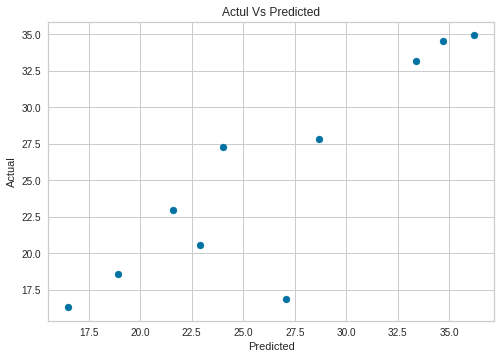

In [42]:
import matplotlib.pyplot as plt

predicted = newPredictions.iloc[:,-1]     # Last column
actual = newPredictions.iloc[:,-2]        # 2nd last column

plt.scatter(actual, predicted)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Actul Vs Predicted')
plt.savefig("result-scatter-plot.jpg", dpi=300)
plt.show()

---
### **3.7 Save prediction results to csv**
---

In [44]:
newPredictions.to_csv("NewPredictions.csv")
# No output

---
### **3.8 Plot the Model**
---
##### Following parameter can be plot for model
- Prediction Error Plot    - 'error'
- Learning Curve           - 'learning'
- Validation Curve         - 'vc'
- Feature Importance       - 'feature'
- Model Hyperparameter     - 'parameter'

---
##### **3.8.1 Create RandomForest or any other model**
---

In [45]:
rf = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.2775,23.7793,4.8764,0.6816,0.1531,0.1016
1,2.1055,8.1377,2.8527,0.8454,0.1182,0.0955
2,2.0461,9.1986,3.0329,0.7845,0.1267,0.0936
3,1.6907,5.0592,2.2493,0.9280,0.1177,0.0932
4,1.5891,3.6111,1.9003,0.9401,0.1014,0.0874
5,2.3897,8.6047,2.9334,0.9185,0.1443,0.1215
6,1.6766,4.7475,2.1789,0.9432,0.1214,0.0874
7,2.6968,25.3083,5.0307,0.7858,0.1968,0.1316
8,2.1075,7.6522,2.7663,0.8749,0.1787,0.1433
9,2.3765,11.5520,3.3988,0.8413,0.1888,0.1542


---
##### **3.8.2 Plot Error (Scatter Plot)**
---

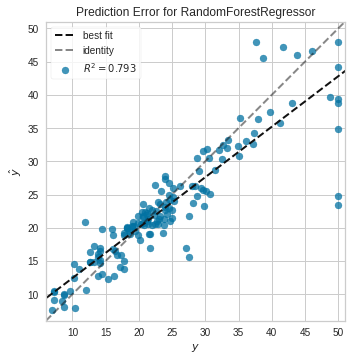

In [46]:
plot_model(rf, plot='error')

---
##### **3.8.3 Plot Learning Curve**
---

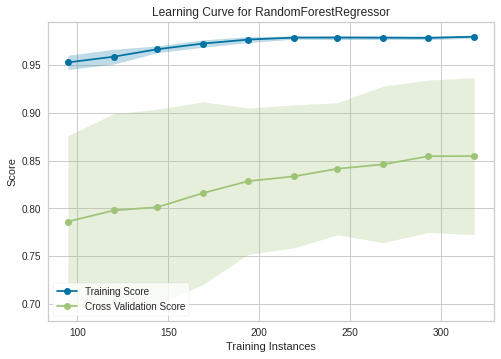

In [47]:
plot_model(rf, plot='learning')

---
##### **3.8.4 Plot Validation Curve**
---

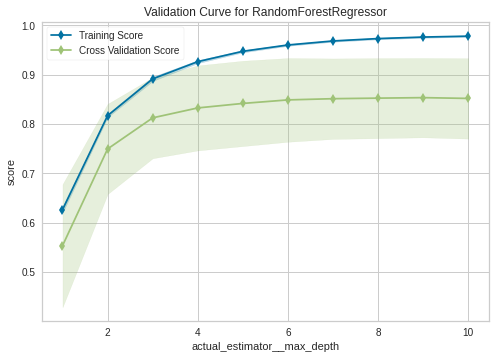

In [48]:
plot_model(rf, plot='vc')

---
### **3.9 Feature Importance**
---

##### **3.9.1 Feature Importance using Random Forest**

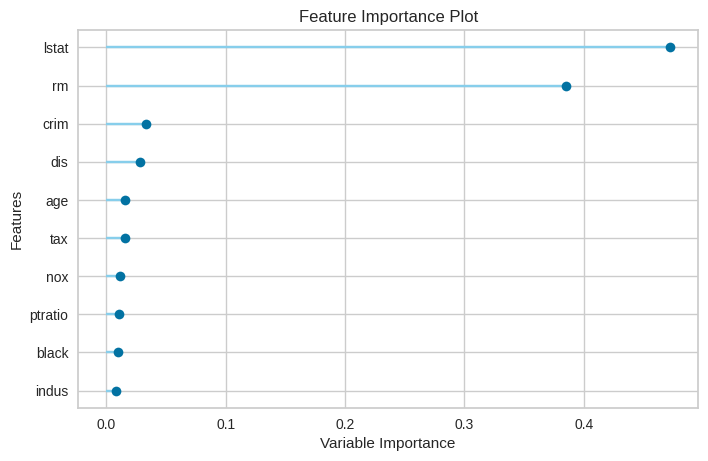

In [49]:
rfModel = create_model('rf', verbose=False)
plot_model(rfModel, plot='feature')

---
##### **3.9.2 Feature Importance using Extra Trees Regressor**
---

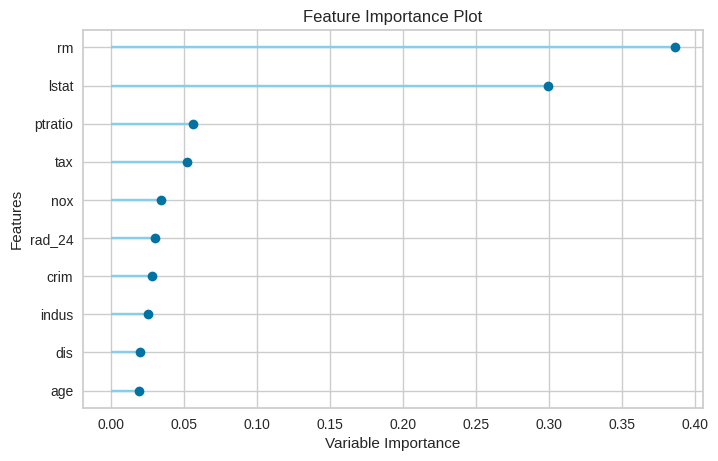

In [50]:
etModel = create_model('et', verbose=False)
plot_model(etModel, plot='feature')

---
##### **3.9.3 Feature Importance using Decision Tree**
---

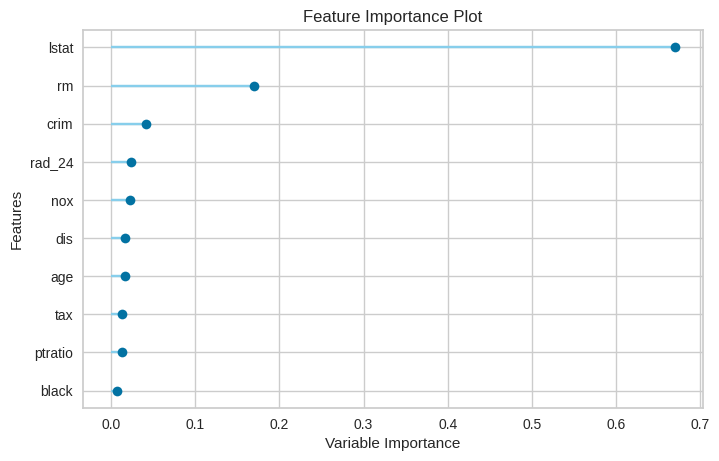

In [51]:
dtModel = create_model('dt', verbose=False)
plot_model(dtModel, plot='feature')

---
##### **3.10 Deploy the model on AWS</span>  <a href="https://pycaret.org/regression/#deploy-model">Click Here</a>**
---

#### **Self Learning Resource**

###### 1. Tutorial on Pycaret <a href="https://pycaret.readthedocs.io/en/latest/tutorials.html"> Click Here</a> 

###### 2. Documentation on Pycaret-Regression: <a href="https://pycaret.org/regression/"> Click Here </a>